In [5]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np
import pandas as pd
 
from tempfile import TemporaryFile
import os
import pickle
import random 
import operator

import math
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
def distance(instance1 , instance2 , k ):
    distance = 0 
    mm1 = instance1[0] 
    cm1 = instance1[1]
    mm2 = instance2[0]
    cm2 = instance2[1]
    distance = np.trace(np.dot(np.linalg.inv(cm2), cm1)) 
    distance+=(np.dot(np.dot((mm2-mm1).transpose() , np.linalg.inv(cm2)) , mm2-mm1 )) 
    distance+= np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
    distance-= k
    return distance

In [7]:
# to get the distance between feature vectors and find neighbors:

def getNeighbors(trainingSet, instance, k):
    distances = []
    for x in range (len(trainingSet)):
        dist = distance(trainingSet[x], instance, k )+ distance(instance, trainingSet[x], k)
        distances.append((trainingSet[x][2], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors #这个neighbor的genre是什么

In [8]:
# Identify the nearest neighbors
def nearestClass(neighbors):
    classVote = {}
    for x in range(len(neighbors)):
        response = neighbors[x] #neighbors 每个元素
        if response in classVote: 
            classVote[response]+=1 #把每个neighbor 的genre计票
        else:
            classVote[response]=1
    sorter = sorted(classVote.items(), key = operator.itemgetter(1), reverse=True)
    return sorter[0][0]

In [9]:
# Define a function for model evaluation
def getAccuracy(testSet, predictions):
    correct = 0 
    for x in range (len(testSet)):
        if testSet[x][-1]==predictions[x]:
            correct+=1
    return 1.0*correct/len(testSet)

In [10]:
#Extract features from the dataset and dump these features into a binary .dat file “my.dat”

directory = "C:\\Users\\yiton\\Downloads\\genres\\"
f= open("my.dat" ,'wb')

# see which genre each number represents 
i=1

results = defaultdict(int)
for folder in os.listdir(directory):
    results[i]=folder
    i+=1
print(results)


defaultdict(<class 'int'>, {1: 'blues', 2: 'classical', 3: 'country', 4: 'disco', 5: 'hiphop', 6: 'jazz', 7: 'metal', 8: 'pop', 9: 'reggae', 10: 'rock'})


In [11]:
# Extract features from the dataset and dump these features into a binary .dat file “my.dat”

i=0
mean_matrix_all = []

for folder in os.listdir(directory):
    i+=1
    if i==11 :
        break   
    for file in os.listdir(directory+folder):  
        (rate,sig) = wav.read(directory+folder+"/"+file)
        mfcc_feat = mfcc(sig,rate ,winlen=0.020, appendEnergy = False)
        covariance = np.cov(np.matrix.transpose(mfcc_feat))
        mean_matrix = mfcc_feat.mean(0)
        list = mean_matrix.tolist() # to generate it into a list
        list.append(results[i]) # add it as the ith column in the data
        mean_matrix_all.append(list)
        feature = (mean_matrix , covariance , i)
        pickle.dump(feature , f)
        
f.close()

In [12]:
# dataframe of features for each song
df = pd.DataFrame(mean_matrix_all)
df.rename(columns={13: "genre"})

,0,1,2,3,4,5,6,7,8,9,10,11,12,genre
0,76.502611,-1.961417,-15.774347,3.831419,-10.473326,1.311828,-19.393732,5.286790,-16.631725,5.353444,-9.856570,6.250077,-5.587495,blues
1,66.931650,0.718853,-3.267830,4.181200,-8.050941,6.448259,-17.768517,14.091810,-18.332536,3.685560,-10.550744,2.887485,-7.788083,blues
2,78.774103,3.039700,-19.024435,-0.983591,-14.699337,7.586562,-12.823053,1.892920,-14.865326,3.595252,-13.961705,1.066102,-6.196685,blues
3,66.696107,9.211514,-4.532876,5.027148,-8.254011,8.101201,-9.676610,9.824043,-6.735213,10.332956,-10.185683,5.412514,-6.100144,blues
4,71.972846,0.506410,-23.834838,-2.181944,-29.875498,0.719521,-19.039014,-1.353935,-13.370416,5.069944,-11.607831,-1.471467,-4.666507,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,73.397825,-4.459683,-14.651107,11.283542,-8.375529,-3.662607,-18.204311,6.734539,-17.631765,7.386032,-8.350394,6.484662,-11.819871,rock
996,73.965494,-4.293810,-18.142045,6.038423,-8.450073,2.086841,-18.216358,8.046921,-17.254868,2.744055,-12.322725,10.490974,-8.910196,rock
997,75.559025,-5.658250,-24.032933,9.404209,-9.382920,0.403674,-12.090986,4.009819,-16.158074,-1.940495,-15.799928,4.584265,-9.707774,rock
998,65.616350,2.290339,-10.020879,15.967210,0.475585,3.193512,-19.001698,4.452534,-15.411609,7.730426,-14.628185,3.267224,-12.534688,rock


<AxesSubplot:xlabel='1', ylabel='4'>

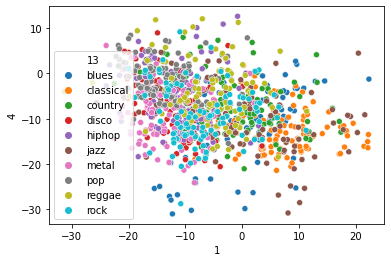

In [353]:
sns.scatterplot(data=df,x=1,y=4,hue=13)

In [13]:
# Train and test split on the dataset:
dataset = []
def loadDataset(filename , split , trSet , teSet):
    with open("my.dat" , 'rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break  

    for x in range(len(dataset)):
        if random.random() <split :      
            trSet.append(dataset[x])
        else:
            teSet.append(dataset[x])  

trainingSet = []
testSet = []

In [14]:
loadDataset("my.dat" , 0.8, trainingSet, testSet)
len(trainingSet)

816

## KFOLD using fixed test set

In [16]:
# test the accuracy using k-folds
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import KFold


In [17]:
whole2 = np.array(trainingSet, dtype=object)

kf = KFold(n_splits=10, shuffle=False, random_state=None)
for train_index, test_index in kf.split(whole2):
    print("TRAIN:", train_index, "TEST:", test_index) #index没有问题

TRAIN: [ 82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326

In [18]:
len(whole2)

816

In [33]:
dat_kfold2 = pd.DataFrame()
n=1
np.random.shuffle(whole2)
leng = len(testSet)

for train_index, test_index in kf.split(whole2):
    W_train, W_test = whole2[train_index], whole2[test_index]
    predictions = []
    for i in [1,3,5,7,9,11,13,15,20,25,30]:
        for x in range (leng):
            predictions.append(nearestClass(getNeighbors(W_train, testSet[x] , i))) 
        accuracy2 = getAccuracy(testSet , predictions)
        dat_kfold2 = dat_kfold2.append({'fold_number': str(n),'knn': i,'accuracy':accuracy2}, ignore_index=True)
        predictions = []
    n+=1


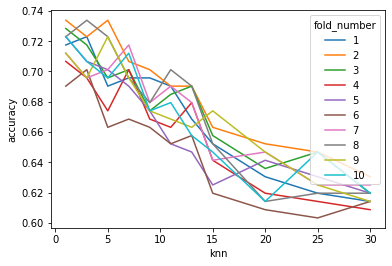

In [20]:
plot = sns.lineplot(data=dat_kfold2, x='knn', y='accuracy',hue='fold_number') 

In [32]:
dat_kfold22 = dat_kfold2
dat_kfold22 = dat_kfold22.groupby("knn")
mean_df = dat_kfold22.mean()
mean_df = mean_df.reset_index()
print(mean_df.sort_values(by='accuracy',ascending=False))

     knn  accuracy
0    1.0  0.716848
1    3.0  0.709783
2    5.0  0.700000
3    7.0  0.698370
4    9.0  0.678261
5   11.0  0.677174
6   13.0  0.672283
7   15.0  0.647283
8   20.0  0.630978
9   25.0  0.627717
10  30.0  0.618478


## KFOLD with different test set
we want to check and see what value of K in KNN gives us the highest accuracy

In [22]:
whole = np.array(dataset, dtype=object)
len(whole)


1000

In [23]:
kf = KFold(n_splits=11, shuffle=False, random_state=None)
for train_index, test_index in kf.split(whole):
    print("TRAIN:", train_index, "TEST:", test_index) 

TRAIN: [ 91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
 325 326 327 328 329 330 331 332 333 334 335

In [24]:
dat_kfold = pd.DataFrame()
n=1
np.random.shuffle(whole)

for train_index, test_index in kf.split(whole):
    W_train, W_test = whole[train_index], whole[test_index]
    leng = len(W_test)
    predictions = []
    for i in [1,3,5,7,9,11,13,15,20,25,30]: 
        for x in range (leng):
            predictions.append(nearestClass(getNeighbors(W_train, W_test[x] , i))) 
        accuracy2 = getAccuracy(W_test , predictions)
        dat_kfold = dat_kfold.append({'fold_number': str(n),'knn': i,'accuracy':accuracy2}, ignore_index=True)
        predictions = []
    n+=1



In [25]:
dat_kfold

,fold_number,knn,accuracy
0,1,1.0,0.802198
1,1,3.0,0.769231
2,1,5.0,0.769231
3,1,7.0,0.791209
4,1,9.0,0.791209
...,...,...,...
116,11,13.0,0.588889
117,11,15.0,0.588889
118,11,20.0,0.566667
119,11,25.0,0.533333


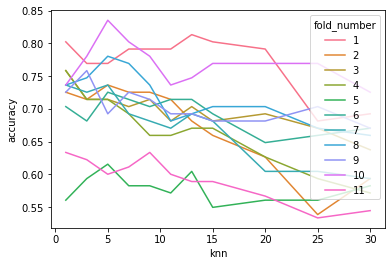

In [26]:
plot = sns.lineplot(data=dat_kfold, x='knn', y='accuracy',hue='fold_number')

In [31]:
dat_kfold11 = dat_kfold
dat_kfold11 = dat_kfold11.groupby("knn")
mean_df1 = dat_kfold11.mean()
mean_df1 = mean_df1.reset_index()
print(mean_df1.sort_values(by='accuracy',ascending=False))

     knn  accuracy
2    5.0  0.719880
0    1.0  0.715917
1    3.0  0.710911
3    7.0  0.709901
4    9.0  0.701931
6   13.0  0.690898
5   11.0  0.682917
7   15.0  0.679909
8   20.0  0.660906
9   25.0  0.634898
10  30.0  0.630914


## Genre accuracy

In [47]:
# Make prediction using KNN and get the accuracy on test data
# build a function that we can implement for each genre

leng = len(testSet)
dat = pd.DataFrame()

def generatelist(n, testset_genre, predictions_genre):
    global dat
    for x in range (leng):
        genre = testSet[x][2]
        if genre == n:
            testset_genre.append(testSet[x])
            predictions_genre.append(nearestClass(getNeighbors(trainingSet ,testSet[x] , 5))) 
    accuracy = getAccuracy(testset_genre , predictions_genre)
    dat = dat.append({'genre': results[n],'knn': 5,'accuracy':accuracy}, ignore_index=True)
    predictions_genre = []

In [48]:
# set empty lists for each genre
predictions_blues = []
predictions_classical = []
predictions_country = []
predictions_disco = []
predictions_hiphop = []
predictions_jazz = []
predictions_metal = []
predictions_pop = []
predictions_reggae = []
predictions_rock = []

testSet_blues = []
testSet_classical = []
testSet_country = []
testSet_disco = []
testSet_hiphop = []
testSet_jazz = []
testSet_metal = []
testSet_pop = []
testSet_reggae = []
testSet_rock = []

In [49]:
generatelist(1, testSet_blues, predictions_blues)
generatelist(2, testSet_classical, predictions_classical)
generatelist(3, testSet_country, predictions_country)
generatelist(4, testSet_disco, predictions_disco)
generatelist(5, testSet_hiphop, predictions_hiphop)
generatelist(6, testSet_jazz, predictions_jazz)
generatelist(7, testSet_metal, predictions_metal)
generatelist(8, testSet_pop, predictions_pop)
generatelist(9, testSet_reggae, predictions_reggae)
generatelist(10, testSet_rock, predictions_rock)

In [50]:
print(dat.sort_values(by='accuracy',ascending=False))

       genre  knn  accuracy
1  classical  5.0  0.944444
7        pop  5.0  0.900000
4     hiphop  5.0  0.866667
2    country  5.0  0.750000
5       jazz  5.0  0.714286
6      metal  5.0  0.705882
8     reggae  5.0  0.687500
3      disco  5.0  0.631579
0      blues  5.0  0.578947
9       rock  5.0  0.461538
